## Handle and analyze climate model output (NAO, ENSO, ISM)

We’ll work with climate model output from a simulation called mil0021 (from Jungclaus et al. 2010).
Each .nc file you see there (NetCDF format) contains gridded world data for:

- Temperature at 2 m → TEMP2
- Pressure at sea level → MSLP
- Total precipitation → TPREC

for two seasons:
- DJF = December–January–February (winter)
- JJA = June–July–August (summer)

Study climate patterns (NAO, ENSO, Monsoon)

In [ ]:
!pip install xarray netCDF4 cartopy matplotlib numpy scipy

In [7]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# 1. One NetCDF file (DJF temperature)
ds = xr.open_dataset('mil0021_EH5_DJF_TEMP2.nc')

# 2. Look at what's inside
print(ds)

<xarray.Dataset> Size: 24MB
Dimensions:    (time: 1302, bnds: 2, lat: 48, lon: 96)
Coordinates:
  * time       (time) object 10kB 0800-02-15 06:00:00 ... 2100-12-31 18:00:00
  * lat        (lat) float32 192B 87.16 83.48 79.78 ... -79.78 -83.48 -87.16
  * lon        (lon) float32 384B 0.0 3.75 7.5 11.25 ... 345.0 348.8 352.5 356.2
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 21kB ...
    2t         (time, lat, lon) float32 24MB ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Tue Oct 31 10:14:13 2023: cdo -seasmean -selseas,DJF mil002...
    institution:  Max Planck Institute for Meteorology
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...


/opt/miniconda3/envs/bern03/lib/python3.11/site-packages/xarray/coding/times.py:213: SerializationWarning: Ambiguous reference date string: 800-1-31 18:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0800-1-31 18:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  ref_date = _ensure_padded_year(ref_date)
/var/folders/6n/0ytpc3591y540__d6t0cmv_h0000gn/T/ipykernel_21730/3255870245.py:6: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates prior reform date (1582-10-15). To silence this warning specify 'use_cftime=True'.
  ds = xr.open_dataset('mil0021_EH5_DJF_TEMP2.nc')


In [8]:
temp = ds['2t']   # 2-meter temperature
lon = ds['lon']
lat = ds['lat']

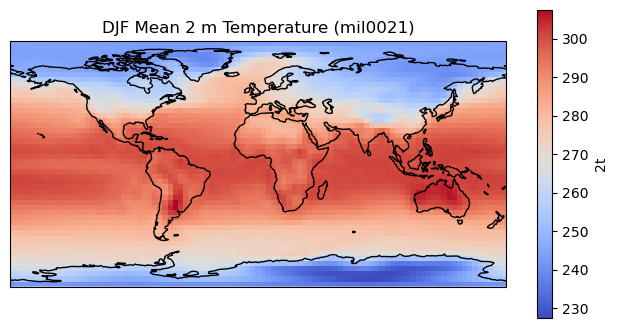

In [9]:
plt.figure(figsize=(8,4))
ax = plt.axes(projection=ccrs.PlateCarree())
temp.mean('time').plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm')
ax.coastlines()
ax.set_title('DJF Mean 2 m Temperature (mil0021)')
plt.show()